# Analysis of housing cost data in California

## 1. Dataset

The California housing dataset is a dataset that includes a variety of information related to housing prices in the state of California. This dataset is primarily used to train machine learning models, especially in home price forecasting models.

The link: https://www.kaggle.com/datasets/sooyoungher/california-housing

The data set contains the following columns:

- MedInc: average income in the area (in tens of thousands of dollars)

- HouseAge: age of houses in the area

- AveRooms: average number of rooms in the house

- AveBedrms: average number of bedrooms in the house

- Population: population of the district

- AveOccup: average number of residents per house

- Latitude: latitude of the district

- Longitude: length of the area

- MedHouseVal: the median cost of a house in the area (in hundreds of thousands of dollars)

## 2. Download and initial data analysis¶

### 2.1 Import Libraries

In [1]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Import Dataset

In [3]:
housing_data = pd.read_csv('/Users/juliabolgova/Documents/Decision_Tree/presentation/fetch_california_housing.csv')
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Data Preprocessing

- The dataset contains 9 columns and 20,640 rows.
- Columns: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal.
- No missing values found.
- Key statistics:
    - Median income: 3.87 (in ten thousand dollars)
    - Median house age: 28.64 years
    - Median house value: $2.06 (in hundred thousand dollars)

### 2.3 Exploratory Analysis

#### 2.3.1 EDA

We will conduct a preliminary analysis of the data to understand what interesting insights can be extracted:
- Data research and visualization

- Distribution of the average value of houses

- Influence of average income on the cost of the house

- Influence of the age of houses on the cost

- Relationship between the number of rooms and cost

- Geographical distribution of the value of houses

Combine all visualizations in one block of code

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


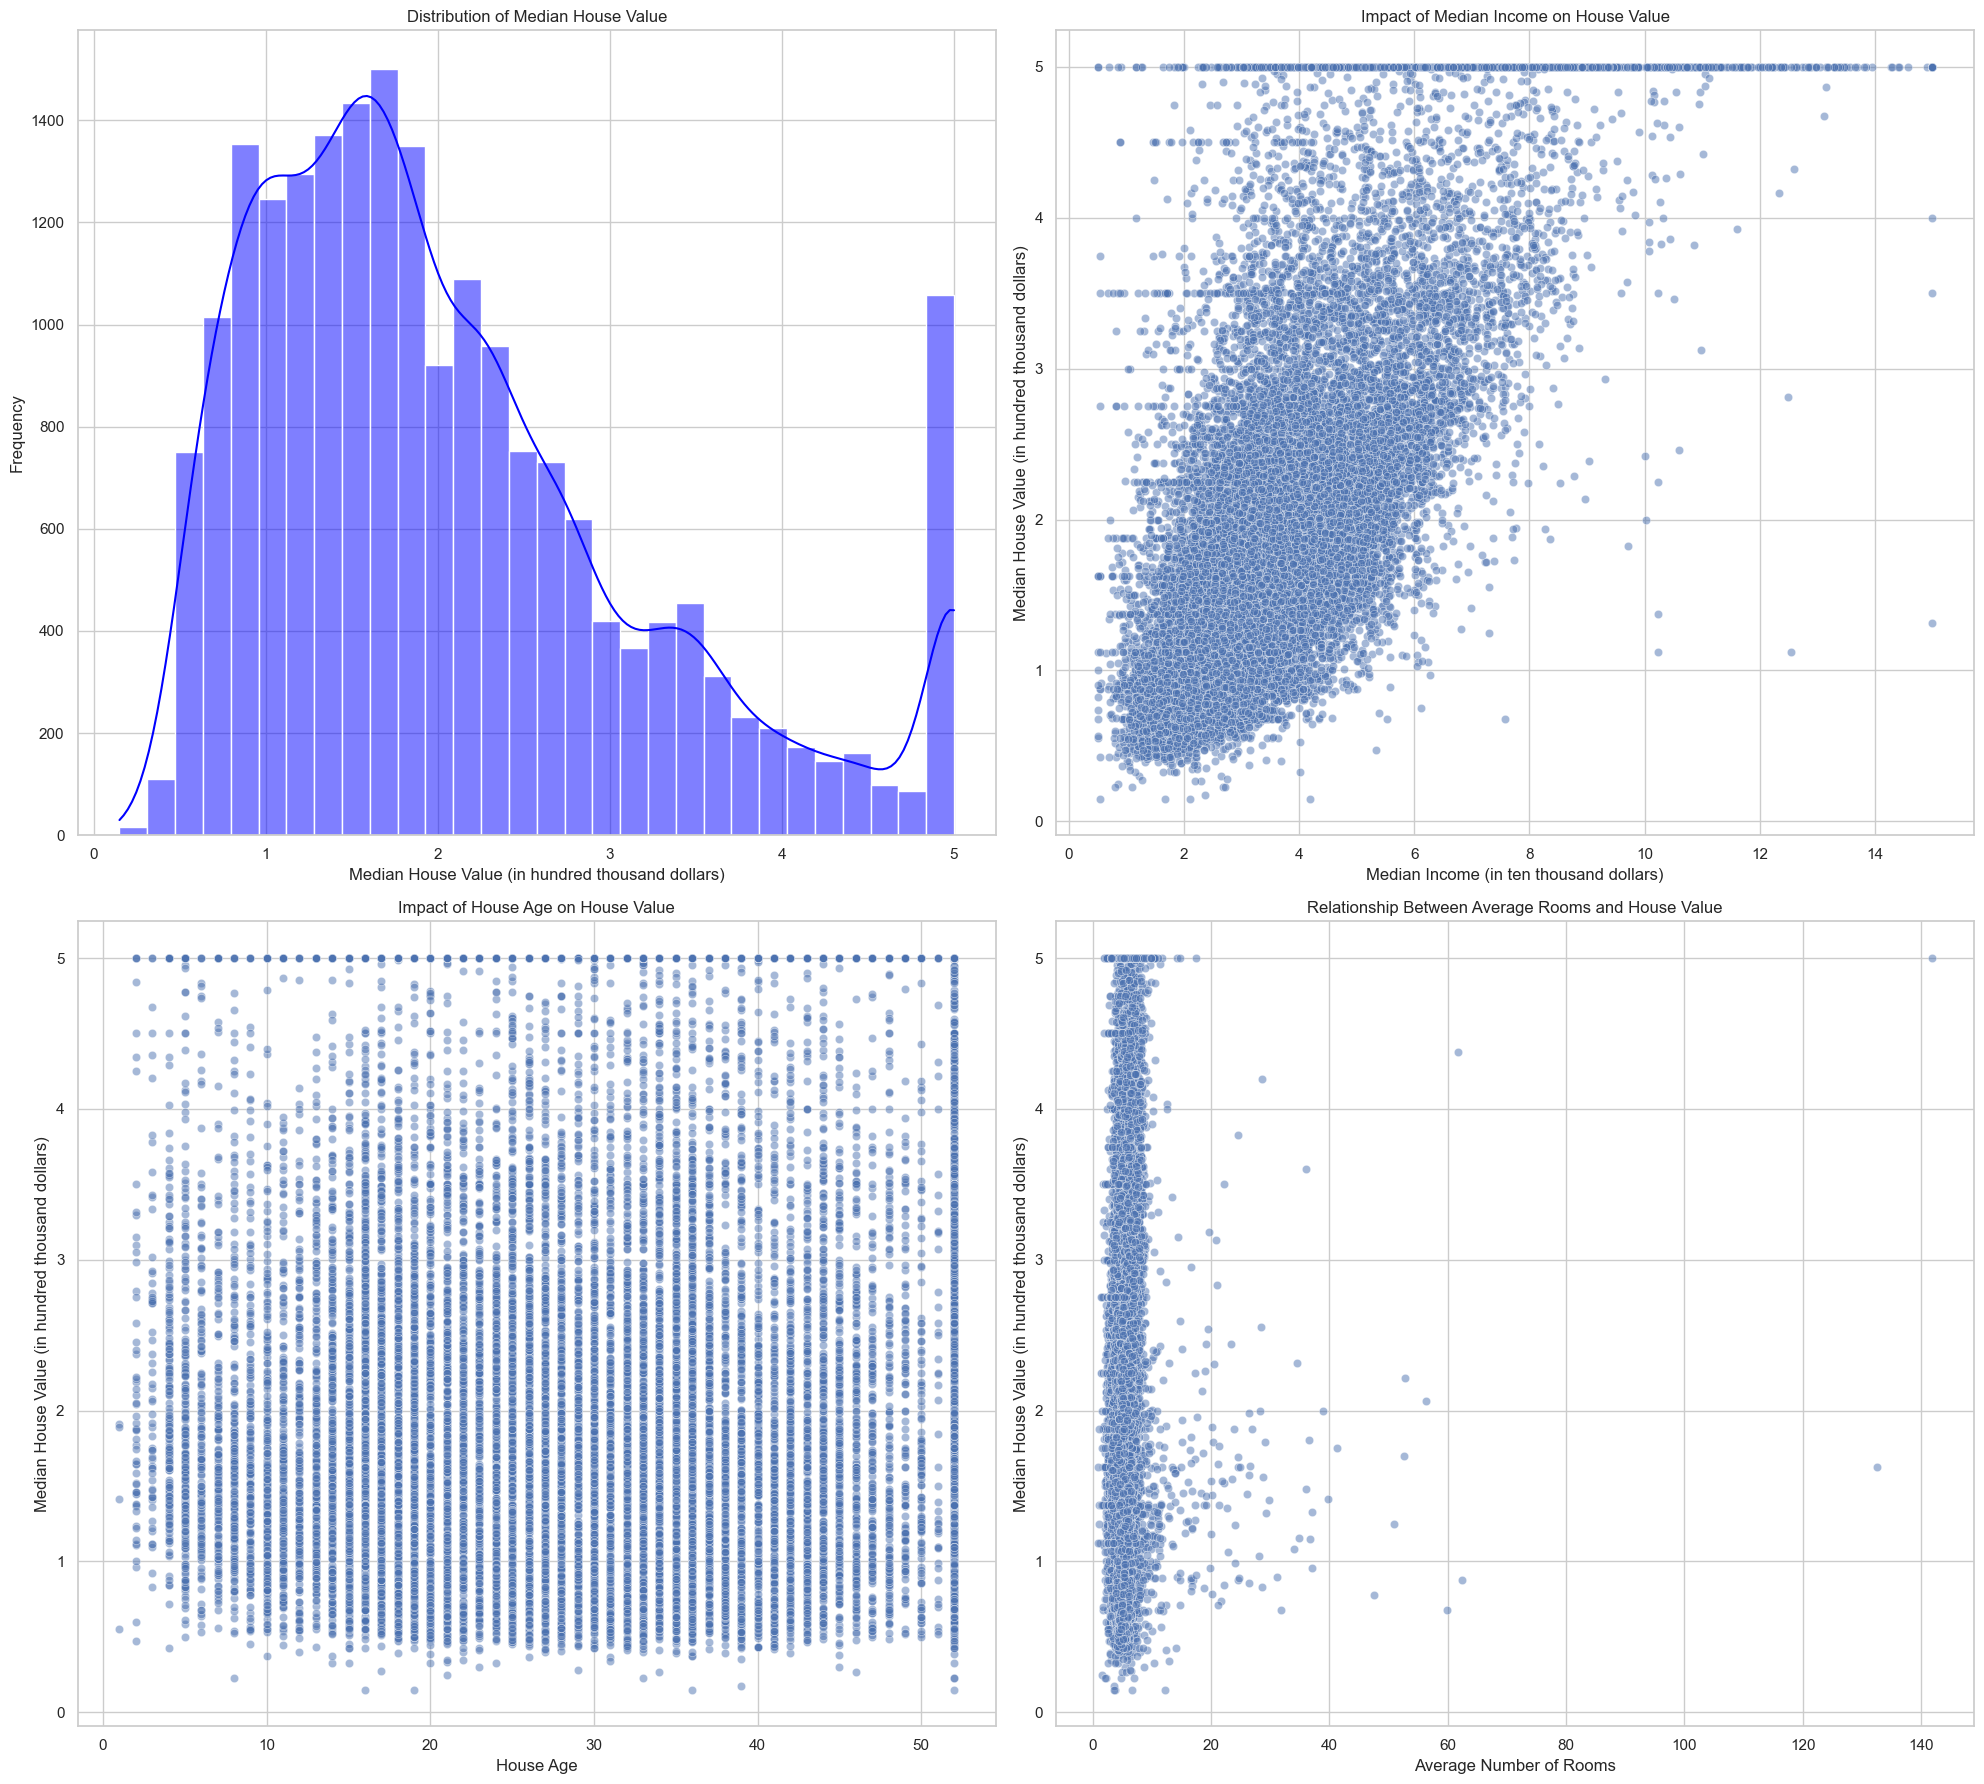

In [6]:
# Set the style for the charts
sns.set(style="whitegrid")

# Create a figure and subgraphs
fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# Distribution of the median house value
sns.histplot(housing_data['MedHouseVal'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Median House Value')
axes[0, 0].set_xlabel('Median House Value (in hundred thousand dollars)')
axes[0, 0].set_ylabel('Frequency')

# The impact of median income on the house value
sns.scatterplot(x='MedInc', y='MedHouseVal', data=housing_data, alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Impact of Median Income on House Value')
axes[0, 1].set_xlabel('Median Income (in ten thousand dollars)')
axes[0, 1].set_ylabel('Median House Value (in hundred thousand dollars)')

# Influence of the age of houses on the house value
sns.scatterplot(x='HouseAge', y='MedHouseVal', data=housing_data, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Impact of House Age on House Value')
axes[1, 0].set_xlabel('House Age')
axes[1, 0].set_ylabel('Median House Value (in hundred thousand dollars)')

# Relationship between the number of rooms and house value
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=housing_data, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Relationship Between Average Rooms and House Value')
axes[1, 1].set_xlabel('Average Number of Rooms')
axes[1, 1].set_ylabel('Median House Value (in hundred thousand dollars)')

plt.tight_layout()
plt.show()

- Distribution of Median House Value

The histogram shows that most houses have a value below $500,000 (5 in hundred thousand dollars). The distribution is right-skewed, indicating the presence of a small number of houses with very high values.


- Impact of Median Income on House Value

The scatter plot shows a positive correlation between median income and house value. This means that neighborhoods with higher incomes tend to have higher house prices.


#### 2.3.2 Correlation Matrix

Correlation Analysis

The correlation matrix shows the relationships between various variables in the dataset. Correlation values range from -1 to 1, where:
- 1: perfect positive correlation
- -1: perfect negative correlation
- 0: no correlation

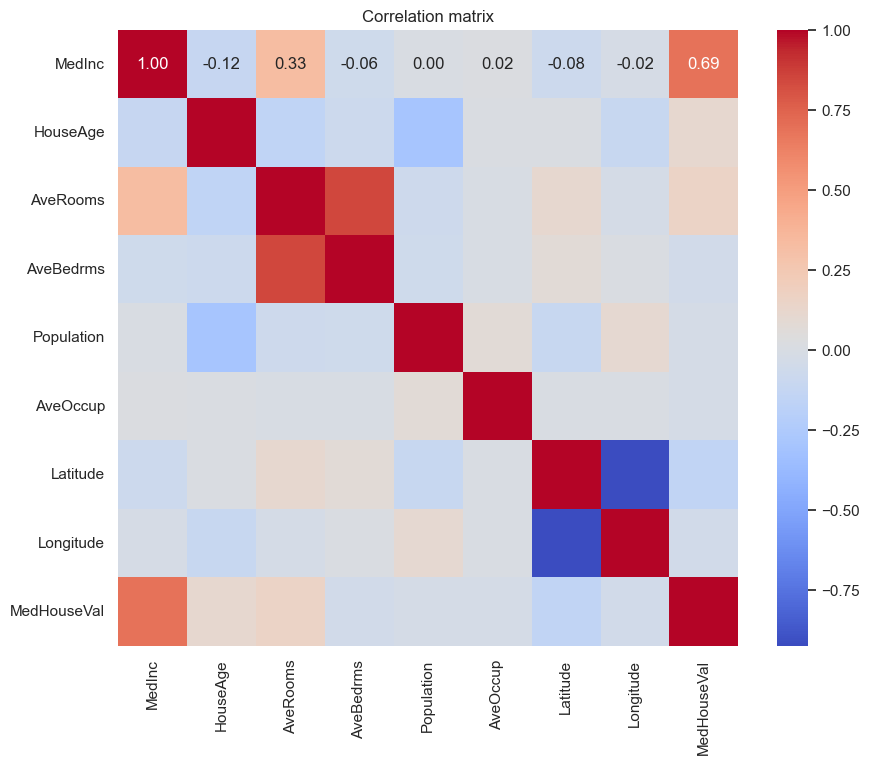

In [7]:
plt.figure(figsize=(10, 8))
correlation_matrix = housing_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.savefig('correlation_matrix.png')

Key findings:
- Median income has a high positive correlation with house value.
- The number of rooms also positively correlates with house value.
- House age has a weak negative correlation with house value.

#### 2.3.3 HeatMap

In [8]:
import folium
from folium.plugins import HeatMap

# Creating a map with a center in California
map_california = folium.Map(location=[37.5, -119.5], zoom_start=6)

# Preparation of data for the heat map
heat_data = [[row['Latitude'], row['Longitude'], row['MedHouseVal']] for index, row in housing_data.iterrows()]

# Adding a heat map
HeatMap(heat_data, radius=10).add_to(map_california)

# Saving the map to an HTML file in the current directory
map_california.save('california_house_value_map.html')

# Displaying the map
map_california


- Geographical Distribution of House Values

The map shows that house values vary depending on their geographical location. Houses in coastal areas of California, such as San Francisco and Los Angeles, have higher values compared to inland areas.

### 3. Conclusion
- **Average house value distribution**: Most houses have a value below $500,000. The distribution has a bevel to the right, which indicates the presence of houses with very high cost.

- **Influence of average income on house value**: There is a positive correlation between average income and house value. Higher-income areas tend to have higher housing prices.

- **Influence of the age of houses on the cost**: There is no clear relationship between the age of the houses and their cost. The cost of houses over the age of 50 may be slightly lower.

- **Connection of the number of rooms and cost**: The average cost of the house increases with the increase in the number of rooms, but from a certain point, the addition of rooms does not lead to a significant increase in cost.

- **Geographical distribution of the value of houses**: Houses in coastal areas of California, such as San Francisco and Los Angeles, have a higher value than inland areas.


Data Analysis Methods:

- Application of linear regression and regularization methods.
- Cluster analysis.